# benchmark analysis

This is a text cell. Start editing!

In [1]:
val df = spark.read
   .option("header",true)
   .option("inferSchema" , true)
   .csv("notebooks/msdemo-test1-zhttp-1625425408.csv")
   .sort("timestamp")
df.show()

+-------------+-------+---------------+--------------------+--------------------+----------+--------+-------+--------------+-----+---------+----------+----------+--------------------+-------+--------+-------+
|    timeStamp|elapsed|          label|        responseCode|     responseMessage|threadName|dataType|success|failureMessage|bytes|sentBytes|grpThreads|allThreads|                 URL|Latency|IdleTime|Connect|
+-------------+-------+---------------+--------------------+--------------------+----------+--------+-------+--------------+-----+---------+----------+----------+--------------------+-------+--------+-------+
|1625425411494|     99|GET /media/demo|Non HTTP response...|Non HTTP response...|Users 1-10|    text|  false|          null| 2581|        0|        36|        36|http://localhost:...|      0|       0|     99|
|1625425411494|    135|GET /media/demo|Non HTTP response...|Non HTTP response...| Users 1-1|    text|  false|          null| 2581|        0|        37|        37|ht

In [2]:
val latency = df.select("Latency")
val bins = (0 to 200 by 1).map(_.toDouble).toArray
val hist = latency.rdd
  .map(value => value.getInt(0))
  .histogram(bins, true)

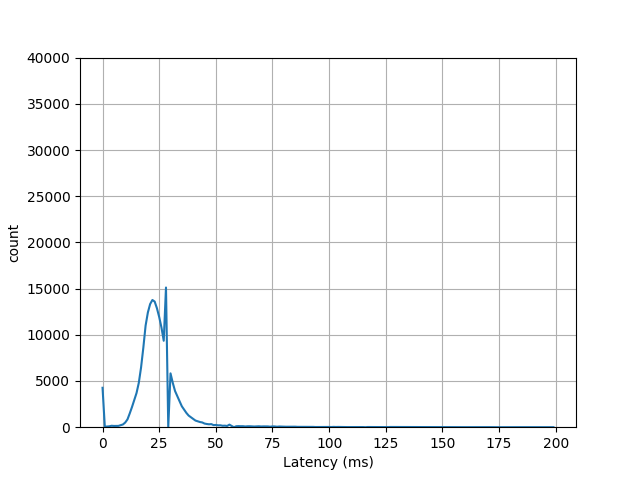

In [3]:
import matplotlib.pyplot as plt
# plt.hist(hist, bins, density=True, facecolor='g', alpha=0.7)
plt.plot(bins[:-1], hist)
plt.grid(True)
plt.ylim(0, 40000)
plt.ylabel("count")
plt.xlabel("Latency (ms)")
plt.show()

In [4]:
import org.apache.spark.sql.expressions.Window
val window = Window.orderBy("timestamp")
  .rangeBetween(-1000L, 0L)
val minTime = df.select($"timestamp")
  .agg(min("timestamp"))
  .head
  .get(0)
val timestamps = df.select($"timestamp".minus(minTime).as("timestamp"))
val throughput = timestamps.select($"timestamp", 
  count("timestamp")
    .over(window)
    .as("throughput"))
val x = throughput.select("timestamp").rdd.map(r => r(0)).collect()
val y = throughput.select("throughput").rdd.map(r => r(0)).collect()

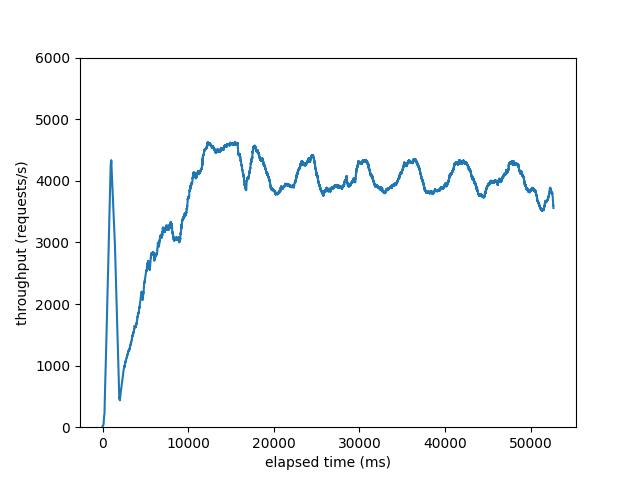

In [5]:
# import matplotlib.pyplot as plt
plt.plot(x, y)
plt.ylim(0, 6000)
plt.xlabel("elapsed time (ms)")
plt.ylabel("throughput (requests/s)")
plt.show()


In [6]:
val elapsedTimeBins = (0 to 200 by 1).map(_.toDouble).toArray
val elapsed = df.select("elapsed")
val eHist = elapsed.rdd
  .map(value => value.getInt(0))
  .histogram(elapsedTimeBins, true)

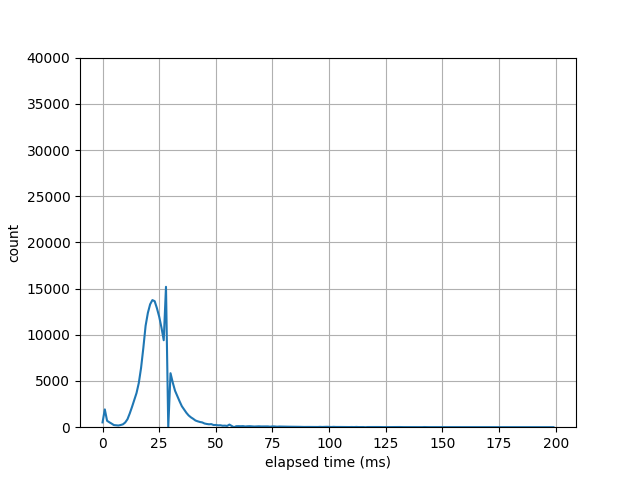

In [7]:
plt.plot(elapsedTimeBins[:-1], eHist)
plt.grid(True)
plt.ylim(0, 40000)
plt.ylabel("count")
plt.xlabel("elapsed time (ms)")
plt.show()